Steven Matthew
2440004445

In [ ]:
import pandas as pd
import numpy as np

import random as rand
import math

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/steven1946/Machine-Learning/main/UTS/insurance-cost.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1336 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
bmi_means = insurance.groupby(['sex'])['bmi'].mean()
mean_female = bmi_means[0]
mean_male = bmi_means[1]

smoker_mode = insurance.groupby(['sex'])['smoker'].agg(pd.Series.mode)
smoker_female = smoker_mode[0]
smoker_male = smoker_mode[1]

print(mean_female)
print(mean_male)
print(smoker_female)
print(smoker_male)

30.372829046898637
30.936229629629633
no
no


In [ ]:
updated_insurance = insurance

updated_insurance.loc[(updated_insurance['sex'] == "female") & (updated_insurance['bmi'].isnull()), 'bmi'] = mean_female
updated_insurance.loc[(updated_insurance['sex'] == "male") & (updated_insurance['bmi'].isnull()), 'bmi'] = mean_male

updated_insurance.loc[(updated_insurance['sex'] == "female") & (updated_insurance['smoker'].isnull()), 'smoker'] = smoker_female
updated_insurance.loc[(updated_insurance['sex'] == "male") & (updated_insurance['smoker'].isnull()), 'smoker'] = smoker_male

updated_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


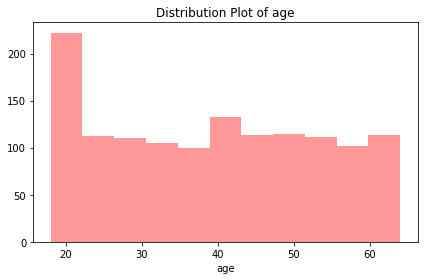

In [ ]:
sns.distplot(updated_insurance['age'], color='red', kde=False)
plt.title(f"Distribution Plot of age")
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


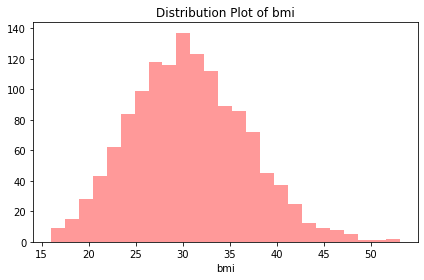

In [ ]:
sns.distplot(updated_insurance['bmi'], color='red', kde=False)
plt.title(f"Distribution Plot of bmi")
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


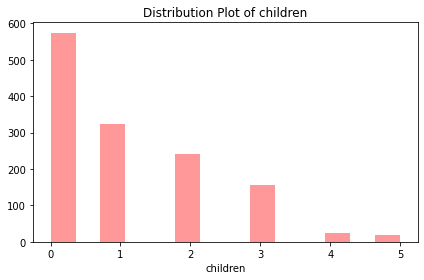

In [ ]:
sns.distplot(updated_insurance['children'], color='red', kde=False)
plt.title(f"Distribution Plot of children")
plt.tight_layout()

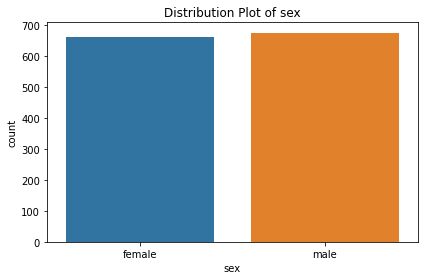

In [ ]:
sns.countplot(x='sex', data=updated_insurance)
plt.title(f"Distribution Plot of sex")
plt.tight_layout()

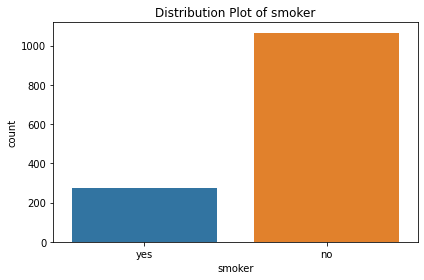

In [ ]:
sns.countplot(x='smoker', data=updated_insurance)
plt.title(f"Distribution Plot of smoker")
plt.tight_layout()

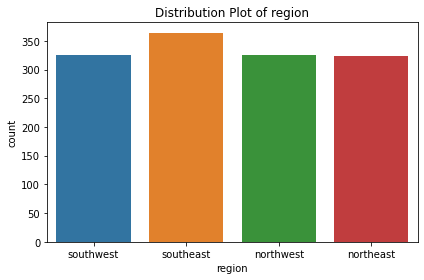

In [ ]:
sns.countplot(x='region', data=updated_insurance)
plt.title(f"Distribution Plot of region")
plt.tight_layout()

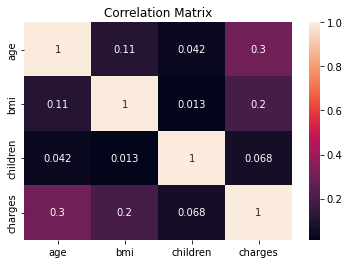

In [ ]:
sns.heatmap(data=updated_insurance.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

Correlation antar setiap independent variabel terhadap dependent variabelnya adalah loose, tetapi age dan bmi menurut saya masih bisa dipakai dan jumlah childrennya bisa di drop saja. antar independent variabel tidak ada yang memiliki korelasi yang kuat sehingga tidak ada yang butuh di drop lagi untuk menghindari multicollinearity

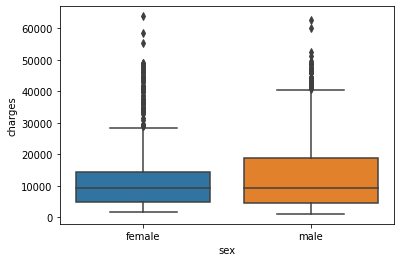

4.3997016974374565 0.03613272100596256


In [ ]:
sns.boxplot(x='sex', y='charges', data=updated_insurance)
plt.show()

sex_male = updated_insurance[updated_insurance['sex'] == 'male']['charges']
sex_female = updated_insurance[updated_insurance['sex'] == 'female']['charges']

fvalue, pvalue = stats.f_oneway(sex_male, sex_female)
print(fvalue, pvalue)

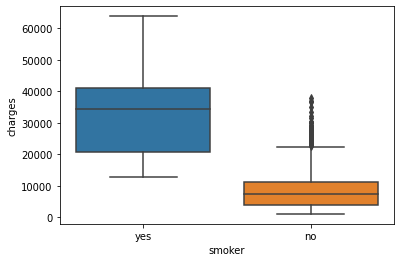

2139.1296810976964 1.3007551169596065e-279


In [ ]:
sns.boxplot(x='smoker', y='charges', data=updated_insurance)
plt.show()

smoker_yes = updated_insurance[updated_insurance['smoker'] == 'yes']['charges']
smoker_no = updated_insurance[updated_insurance['smoker'] == 'no']['charges']

fvalue, pvalue = stats.f_oneway(smoker_yes, smoker_no)
print(fvalue, pvalue)

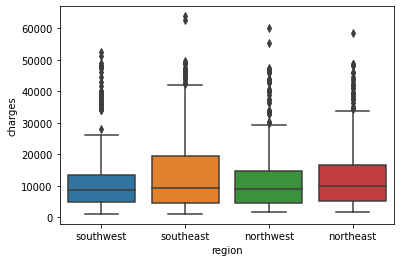

2.96962669358912 0.0308933560705201


In [ ]:
sns.boxplot(x='region', y='charges', data=updated_insurance)
plt.show()

region_sw = updated_insurance[updated_insurance['region'] == 'southwest']['charges']
region_se = updated_insurance[updated_insurance['region'] == 'southeast']['charges']
region_nw = updated_insurance[updated_insurance['region'] == 'northwest']['charges']
region_ne = updated_insurance[updated_insurance['region'] == 'northeast']['charges']

fvalue, pvalue = stats.f_oneway(region_sw, region_se, region_nw, region_ne)
print(fvalue, pvalue)

P-Value dari semua variabel objek adalah dibawah 0.05 yang berarti variabel tersebut tidak memberikan arti yang signifikan sehingga datanya dapat kita drop saja

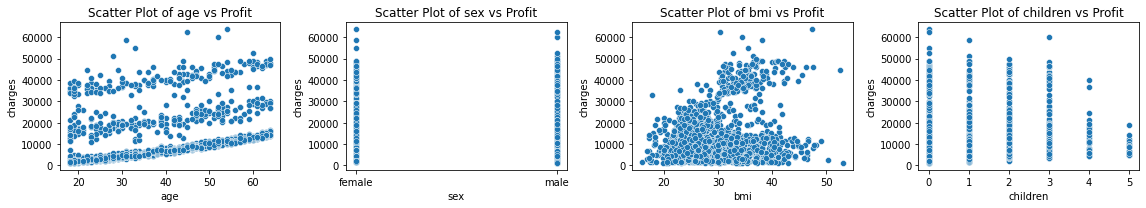

In [ ]:
plt.figure(figsize=(20, 3))

for i, col in zip(range(1, 5), insurance.columns):
    plt.subplot(1, 5, i)
    sns.scatterplot(x=col, y='charges', data=insurance)
    plt.title(f"Scatter Plot of {col} vs Profit")
    plt.tight_layout()

bentuk scatterplot antar independent variabel tidak ada yang terlihat bagus, semuanya tersebar oleh karena itu tidak ada yang bagus hubungan antar independent variabel dengan dependent variabel

In [ ]:
X = updated_insurance.loc[:, updated_insurance.columns != 'charges']
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
y = updated_insurance['charges']

Menampilkan training set dengan ratio 4:1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [ ]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [ ]:
X_dropped = X_train.drop(['sex','smoker','region', 'children'], axis=1)
X_test_dropped= X_test.drop(['sex','smoker','region', 'children'], axis=1)

In [ ]:
X_dropped

,age,bmi
560,46,19.950
1285,47,24.320
1142,52,24.860
969,39,34.320
486,54,21.470
...,...,...
1095,18,31.350
1130,39,23.870
1294,58,25.175
860,37,47.600


In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_transform=sc.fit_transform(X_dropped)

In [ ]:
class gradient_descent:
  def __init__(self, nvar):
    self.intercept = 0
    self.theta = np.random.randn(nvar)

  def predict(self, X, theta, intercept):
    return np.array(intercept + np.dot(X, theta))

  def update_theta(self, X, y, y_pred, alpha):
    deriv_theta = (2/len(y)) * np.dot((y_pred - y), X)
    return self.theta - (alpha * deriv_theta)

  def update_intercept(self, y, y_pred, alpha):
    deriv_intercept = (2/len(y)) * np.sum(y_pred - y)
    return self.intercept - (alpha * deriv_intercept)

  def get_MSE(self, y, y_pred):
    return np.sum((y - y_pred)**2) / len(y)

  def fit(self, X, y, epochs, alpha):
    loss = []
  
    for i in range(epochs):
      y_pred = self.predict(X, self.theta, self.intercept)
      self.theta = self.update_theta(X, y, y_pred, alpha)
      self.intercept = self.update_intercept(y, y_pred, alpha)
      loss.append(self.get_MSE(y, y_pred))

    return loss

In [ ]:
X_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1070 non-null   int64  
 1   bmi     1070 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 25.1 KB


In [ ]:
y_train.count()

1070

In [ ]:
all_loss = []


model = gradient_descent(X_dropped.shape[1])
epochs = 5000
loss = model.fit(X_transform, y_train, epochs, 0.01)
all_loss.append([0.01, loss])

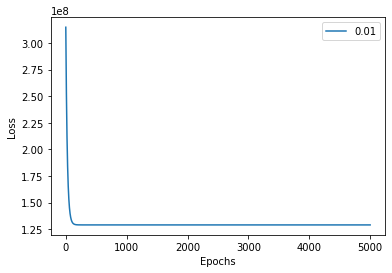

In [ ]:
plt.plot(np.arange(1, epochs), all_loss[0][1][1:], label=all_loss[0][0])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = gradient_descent(X_dropped.shape[1])
epochs = 5000
_ = model.fit(X_transform, y_train, epochs, 0.01)

Prediksi menggunakan test set

In [ ]:
print(f'Intercept: {model.intercept}')
print(f'Theta: {model.theta}')

Intercept: 13346.089736364442
Theta: [3148.55029329 1979.9371592 ]


Intercept value disini adalah value yang akan muncul untuk charges ketika semua independent variable di 0 kan, tetapi menurut saya value ini tidak terlalu berarti karena age dan bmi tidak mungkin 0.
dan theta adalah angka perkalian yang akan dikalikan dengan independent variabel masing-masing untuk mendapatkan angka dependent variabel prediction

In [ ]:
w = model.theta
b = model.intercept

In [ ]:
def final_predict(X):
  return b + np.dot(X, w)

In [ ]:
y_pred = final_predict(sc.transform(X_test_dropped))
compare = pd.DataFrame({
    'y_pred': y_pred,
    'y_true': y_test
})

compare.head()

,y_pred,y_true
764,12844.765190,9095.06825
887,12418.970316,5272.17580
890,17658.004728,29330.98315
1293,13255.475927,9301.89355
259,9237.015545,33750.29180


Scikit-Learn

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_dropped, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_dropped)
print(y_test.head())
print(pd.Series(y_pred).head())

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64
0    12844.765190
1    12418.970316
2    17658.004728
3    13255.475927
4     9237.015545
dtype: float64


Coefficient Masing-masing variabel

In [ ]:
print("Model's weights:")
print("w0 =", model.intercept_)
print("w1 =", model.coef_[0])
print("w2 =", model.coef_[1])

Model's weights:
w0 = -5481.475033686647
w1 = 223.81920791089223
w2 = 327.8798755906233


Untuk w1(age) dan w2(bmi) keduanya karena positif berarti ketika value w1 maupun w2 bertambah, dependentnya(Charges) bertambah juga

MAE atau mean absolute error adalah rata-rata perbedaan absolut antara aktual dan prediksi. Angka ini menunjukkan rata-rata residue dari dataset

In [ ]:
mean_absolute_error(y_test, y_pred)

9219.09219761038

MSE atau mean squared error adalah rata-rata perbedaan kuadrat antara aktual dan prediksi. Angka ini menunjukkan varians residue dari dataset

In [ ]:
#MSE
mean_squared_error(y_test, y_pred)

131399057.54253428

RMSE atau root mean squared error menunjukkan standar deviasi dari dataset

In [ ]:
#RMSE
mean_squared_error(y_test, y_pred, squared=False)

11462.942795920002

Skor R2 menunjukkan seberapa besar pengaruh dari independent variabel terhadap dependent variabelnya

In [ ]:
r2_score(y_test, y_pred)

0.15362234344892534

R2 0.15 atau 15% berarti age dan bmi hanya berpengaruh sebanyak 15% terhadap charges dan 85% dipengaruhi oleh variabel lainnya.
Angka ini cukup masuk akal karena ketika di awal kita lihat heatmapnya, semua independet variabel sangat loose dengan dependent.

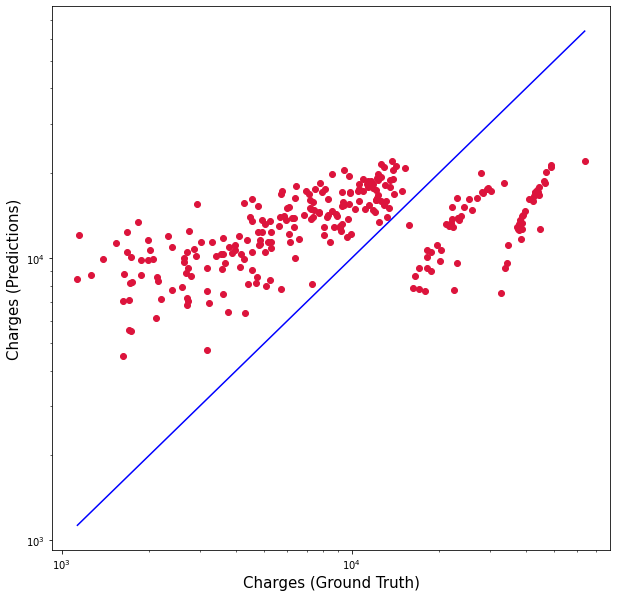

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, c='crimson')

plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Charges (Ground Truth)', fontsize=15)
plt.ylabel('Charges (Predictions)', fontsize=15)
plt.show()